# Instalando paquetes

In [71]:
#pip install opencv-python
#pip install -U matplotlib
#pip install seaborn

### Importando paquetes

In [72]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Problema 1
Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

### Reutilizando la función "generarEscalaGris3d" del laboratorio 1
Esta función se utilizará para generar 3 imagenes distintas en escala de grises para pobrar la función que se encargará de realizar la binarización de la imagen.

In [96]:
def generarEscalaGris3D(imagen):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    canales = imagen.shape[2]
    img_roja = np.zeros((alto,ancho,1), dtype=np.uint8)
    img_verde = np.zeros((alto,ancho,1), dtype=np.uint8)
    img_azul = np.zeros((alto,ancho,1), dtype=np.uint8)
    for i in range(0,alto):
        for j in range(0,ancho):
            vRojo=imagen[i,j][0]
            vVerde=imagen[i,j][1]   
            vAzul=imagen[i,j][2]  
            img_roja[i,j] = vRojo
            img_verde[i,j] = vVerde
            img_azul[i,j] = vAzul
    return img_roja,img_verde,img_azul

### Función "binarizacion" 

In [99]:
def binarizacion(imagen,umbral):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    canales = imagen.shape[2]
    img_salida = np.zeros_like(imagen)
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel=imagen[i,j][0]
            if(pixel<umbral): 
                pixel =  0
            else: 
                pixel = 255
            img_salida[i,j] = pixel
    #plt.imshow(img_salida)
    #plt.show
    return img_salida
    

### Probando la función

(np.float64(-0.5), np.float64(799.5), np.float64(411.5), np.float64(-0.5))

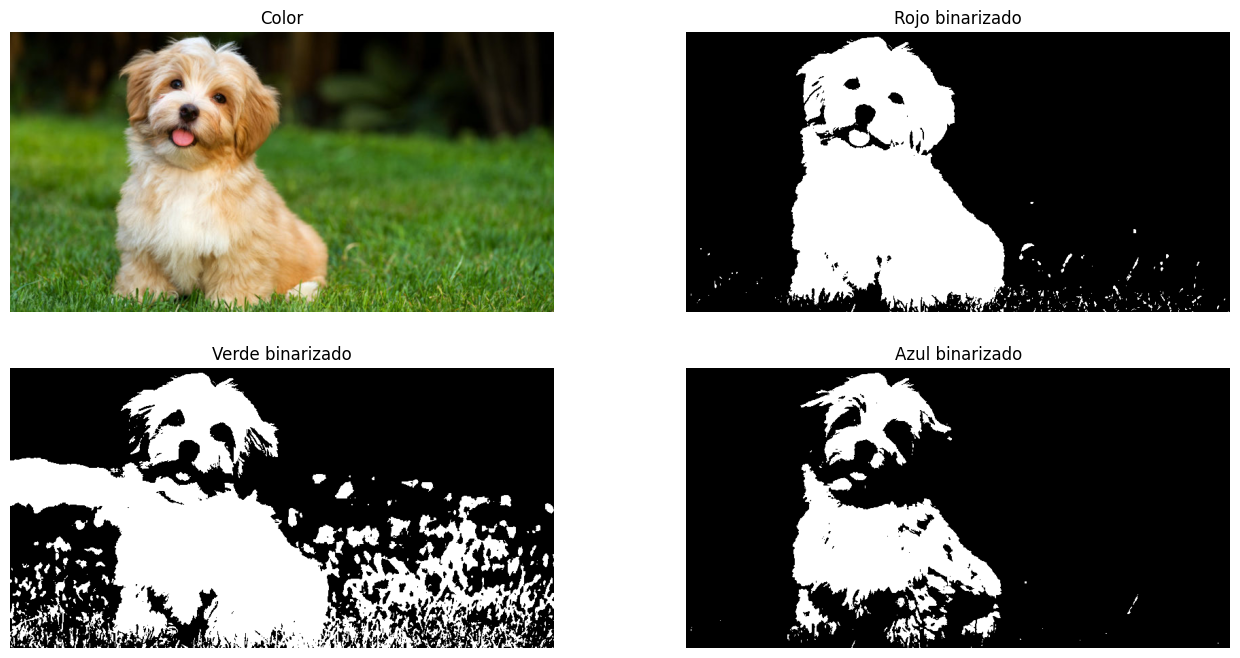

In [101]:
img = cv2.imread("perro1.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
r,g,b = generarEscalaGris3D(img)
umbral=128

plt.figure(figsize=(16,8))
plt.subplot(221)
plt.imshow(img)
plt.title('Color') 
plt.axis("off")

plt.subplot(222)
plt.imshow(binarizacion(r,umbral),cmap=plt.cm.gray)
plt.title('Rojo binarizado') 
plt.axis("off")

plt.subplot(223)
plt.imshow(binarizacion(g,umbral),cmap=plt.cm.gray)
plt.title('Verde binarizado') 
plt.axis("off")

plt.subplot(224)
plt.imshow(binarizacion(b,umbral),cmap=plt.cm.gray)
plt.title('Azul binarizado') 
plt.axis("off")

# Problema 2
Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas iḿagenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

### Función operacionesAritmeticasLogicas 

In [102]:
def operacionesAritmeticasLogicas(img1,img2):
    #Calculando alto y ancho mínimos
    alto=0
    ancho=0
    if (img1.shape[0]<=img2.shape[0]):
        alto=img1.shape[0]
    else:
        alto=img2.shape[0]
    if (img1.shape[1]<=img2.shape[1]):
        ancho=img1.shape[1]
    else:
        ancho=img2.shape[1]
    #Resizing de imágenes para que tengan el mismo tamaño
    imgResized1 = cv2.resize(img1, (ancho,alto), interpolation=cv2.INTER_AREA)
    imgResized2 = cv2.resize(img2, (ancho,alto), interpolation=cv2.INTER_AREA)
    #Escala de grises para las imagenes de entrada
    rImg1,a,c = generarEscalaGris3D(imgResized1)
    rImg2,a,c = generarEscalaGris3D(imgResized2)
    #Binarización de imágenes de entrada
    umbral=128
    img1BinRojo = binarizacion(rImg1,umbral)
    img2BinRojo = binarizacion(rImg2,umbral)
    #Inicializando imágenes de salida
    imgSuma = np.zeros((alto,ancho,3), dtype=np.uint8)
    imgResta = np.zeros((alto,ancho,3), dtype=np.uint8)
    imgAND = np.zeros((alto,ancho,1), dtype=np.uint8)
    imgOR = np.zeros((alto,ancho,1), dtype=np.uint8)
    imgXOR = np.zeros((alto,ancho,1), dtype=np.uint8)
    for i in range(0,alto):
        for j in range(0,ancho):
            pImg1 = imgResized1[i,j]
            pImg2 = imgResized2[i,j]
            #suma
            r=int(pImg1[0]) + int(pImg2[0])
            g=int(pImg1[1]) + int(pImg2[1])
            b=int(pImg1[2]) + int(pImg2[2])
            if(r>255): r=255 
            if(g>255): g=255
            if(b>255): b=255
            imgSuma[i,j] = [r,g,b]
            #resta
            r=int(pImg1[0]) - int(pImg2[0])
            g=int(pImg1[1]) - int(pImg2[1])
            b=int(pImg1[2]) - int(pImg2[2])
            if(r<0): r=0 
            if(g<0): g=0
            if(b<0): b=0
            imgResta[i,j] = [r,g,b]
            #pixeles imagen binarizada
            pImg1=img1BinRojo[i,j][0]
            pImg2=img2BinRojo[i,j][0]
            #and
            valor= pImg1 and pImg2
            imgAND[i,j] = valor
            #or
            valor= pImg1 or pImg2
            imgOR[i,j] = valor
            #xor
            valor= pImg1 ^ pImg2
            imgXOR[i,j] = valor
    return imgResized1,imgResized2,imgSuma,imgResta,imgAND,imgOR,imgXOR

### Probando la función

(np.float64(-0.5), np.float64(799.5), np.float64(411.5), np.float64(-0.5))

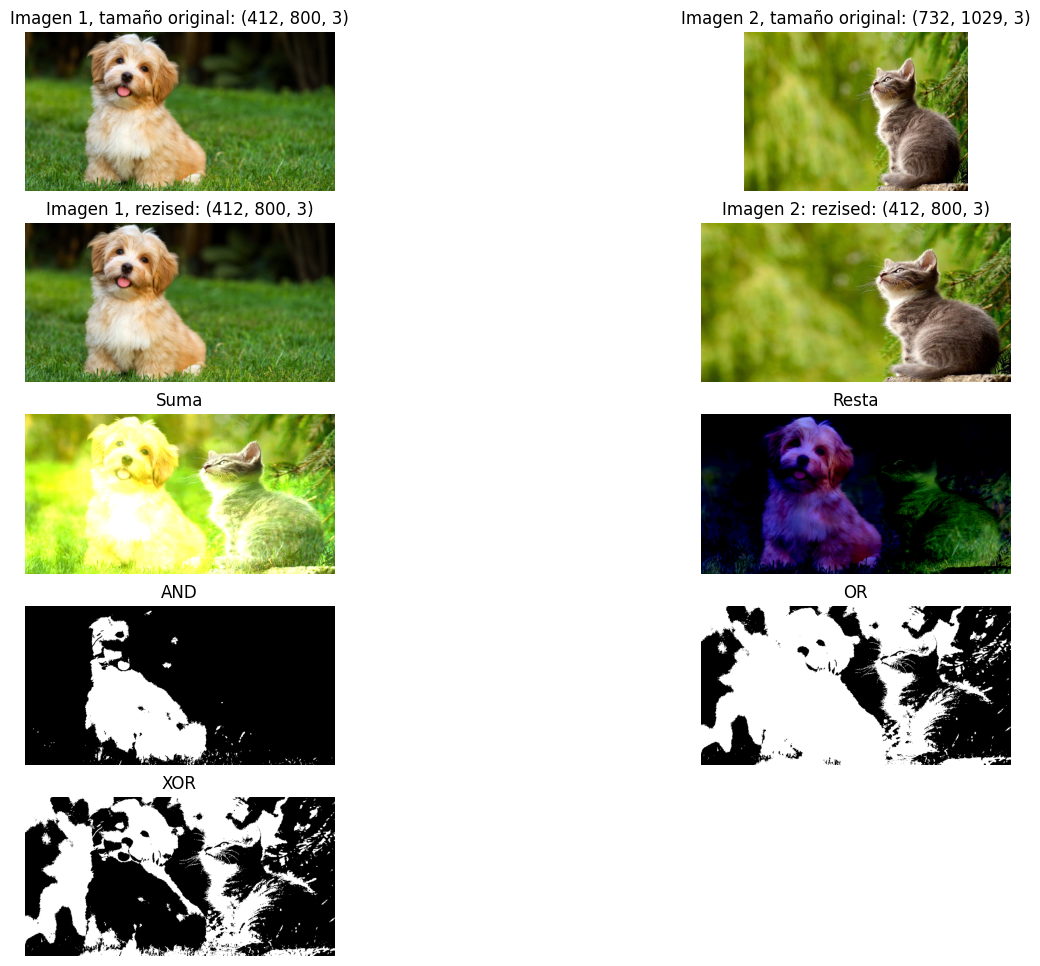

In [104]:
img1 = cv2.imread("perro1.jpeg")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread("gato1.jpeg")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

imgResized1,imgResized2,imgSuma,imgResta,imgAND,imgOR,imgXOR = operacionesAritmeticasLogicas(img1,img2)

plt.figure(figsize=(16,12))
plt.subplot(5,2,1)
plt.imshow(img1)
plt.title('Imagen 1, tamaño original: ' + str(img1.shape)) 
plt.axis("off")

plt.subplot(5,2,2)
plt.imshow(img2)
plt.title('Imagen 2, tamaño original: ' + str(img2.shape)) 
plt.axis("off")

plt.subplot(5,2,3)
plt.imshow(imgResized1)
plt.title('Imagen 1, rezised: ' + str(imgResized1.shape)) 
plt.axis("off")

plt.subplot(5,2,4)
plt.imshow(imgResized2)
plt.title('Imagen 2: rezised: ' + str(imgResized2.shape)) 
plt.axis("off")

plt.subplot(5,2,5)
plt.imshow(imgSuma)
plt.title('Suma') 
plt.axis("off")

plt.subplot(5,2,6)
plt.imshow(imgResta)
plt.title('Resta') 
plt.axis("off")

plt.subplot(5,2,7)
plt.imshow(imgAND,cmap=plt.cm.gray)
plt.title('AND') 
plt.axis("off")

plt.subplot(5,2,8)
plt.imshow(imgOR,cmap=plt.cm.gray)
plt.title('OR') 
plt.axis("off")

plt.subplot(5,2,9)
plt.imshow(imgXOR,cmap=plt.cm.gray)
plt.title('XOR') 
plt.axis("off")

# Problema 3
Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

### Función muestraImagen3D

In [79]:
def muestraImagen3D(imagen):
    
    fig = plt.figure(figsize=(20, 10))
    original = fig.add_subplot(1,3,1)
    original.imshow(imagen,cmap=plt.cm.gray)
    plt.title('Imagen original')

       
    x, y = np.mgrid[0:imagen.shape[0], 0:imagen.shape[1]]
    
    ax = fig.add_subplot(1,3,2, projection='3d')
    ax.plot_surface(x, y, imagen, rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=2)
    ax.view_init(70, 30)
    plt.title('Escala de grises en 3 dimensiones (vista 1)')


    ax2 = fig.add_subplot(1,3,3, projection='3d')
    ax2.plot_surface(x, y, imagen, rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=1)
    ax2.view_init(90, 30)
    plt.title('Escala de grises en 3 dimensiones (vista 2)')
    plt.show()

### Probando la función

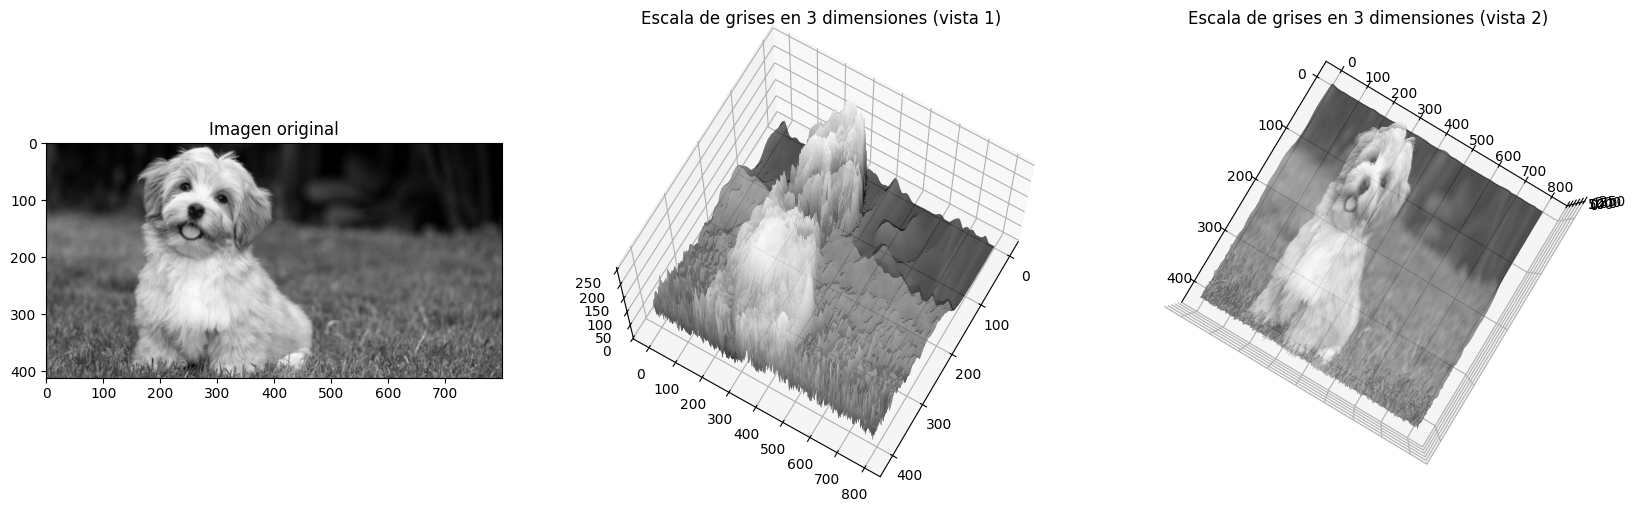

In [80]:
img = cv2.imread("perro1.jpeg")
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
muestraImagen3D(img)

# Problema 4
Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

### Función transformacionNegativa

In [81]:
def transformacionNegativa(imagen):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    img_salida = np.zeros_like(imagen)
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel=imagen[i,j]
            valorSalida = (255-pixel)
            img_salida[i,j] = valorSalida
    return img_salida

### Función transformacionLineal

In [82]:
def transformacionLineal(imagen, ganancia, offset):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    img_salida = np.zeros_like(imagen)
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel=imagen[i,j]
            valorSalida = ganancia * pixel + offset
            if(valorSalida>255): valorSalida=255
            elif(valorSalida<0): valorSalida=0 
            img_salida[i,j] = valorSalida
    return img_salida

### Función transformacionLogaritmica

In [83]:
import math
def transformacionLogaritmica(imagen, ganancia):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    img_salida = np.zeros_like(imagen)
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel=imagen[i,j]
            valorSalida = ganancia * math.log1p(pixel)
            if(valorSalida>255): valorSalida=255
            elif(valorSalida<0): valorSalida=0
            img_salida[i,j] = valorSalida
    return img_salida

### Función transformacionExponencial

In [84]:
def transformacionExponencial(imagen,ganancia,factor):    
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    img_salida = np.zeros_like(imagen)
    if (factor<0): 
        print("El valor del factor debe ser mayor a cero")
        return img_salida
    for i in range(0,alto):
        for j in range(0,ancho):
            pixel=imagen[i,j]
            valorSalida = ganancia * math.pow(pixel,factor)
            if(valorSalida>255): valorSalida=255
            elif(valorSalida<0): valorSalida=0
            img_salida[i,j] = valorSalida
    return img_salida

### Probando las funciones

(np.float64(-0.5), np.float64(799.5), np.float64(411.5), np.float64(-0.5))

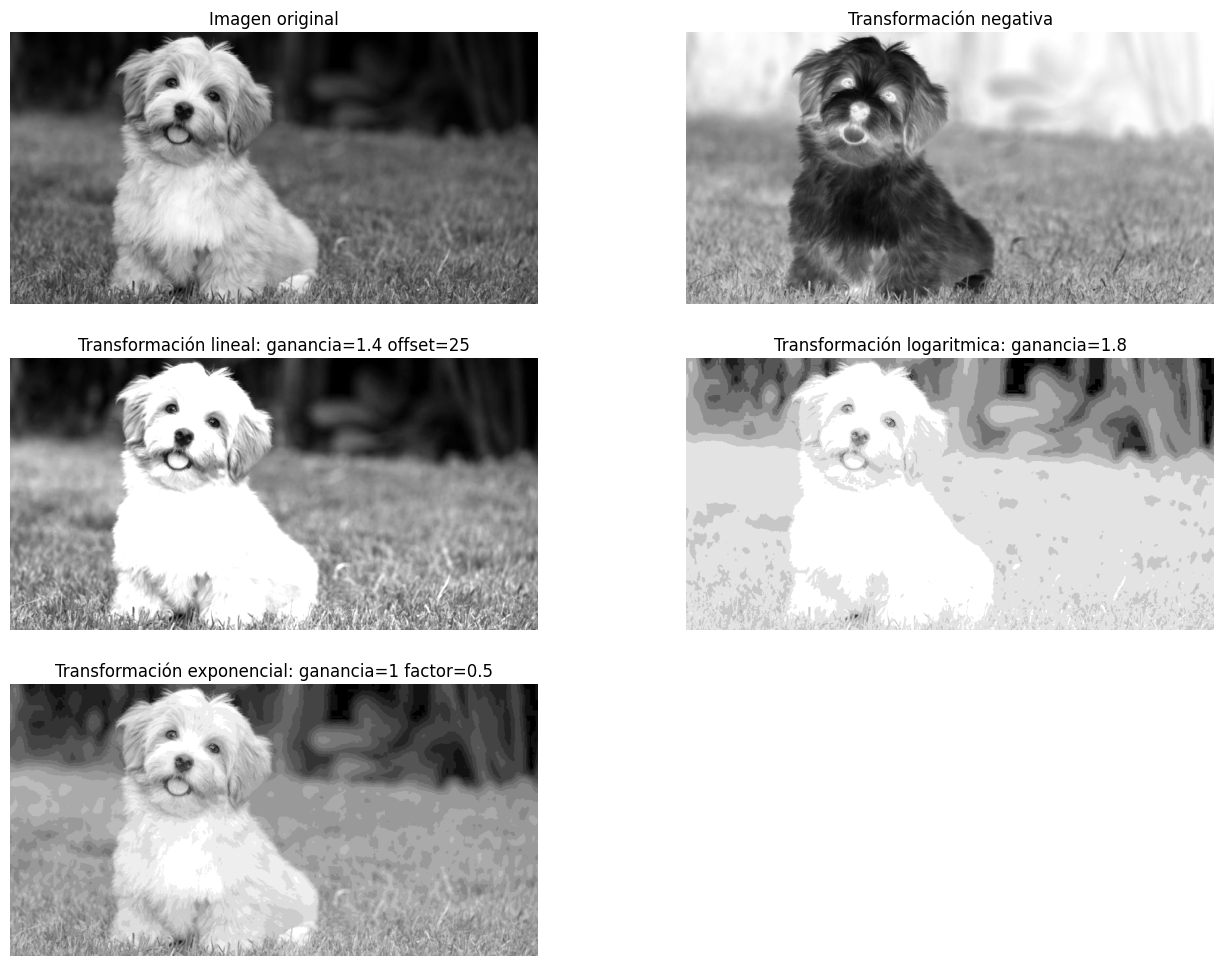

In [85]:
img = cv2.imread("perro1.jpeg")
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 


plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title('Imagen original') 
plt.axis("off")

plt.subplot(3,2,2)
plt.imshow(transformacionNegativa(img),cmap=plt.cm.gray)
plt.title('Transformación negativa') 
plt.axis("off")

plt.subplot(3,2,3)
ganancia=1.4
offset=25
plt.imshow(transformacionLineal(img,ganancia,offset),cmap=plt.cm.gray)
plt.title('Transformación lineal: ganancia=' + str(ganancia) + " offset=" + str(offset)) 
plt.axis("off")

plt.subplot(3,2,4)
ganancia=1.8
plt.imshow(transformacionLogaritmica(img,ganancia),cmap=plt.cm.gray)
plt.title('Transformación logaritmica: ganancia=' + str(ganancia)) 
plt.axis("off")

plt.subplot(3,2,5)
ganancia=1
factor=0.5
plt.imshow(transformacionExponencial(img,ganancia,factor),cmap=plt.cm.gray)
plt.title('Transformación exponencial: ganancia=' + str(ganancia) + " factor=" + str(factor)) 
plt.axis("off")



# Problema 5
Desarrolle una función que dada una imagen a color, cualquier kernel con cualquier dimensión (3X3, 5X5, 7X7, 9X9, 11X11) y cualquier tipo (gaussiano, Sobel, Sharp, unsharp, laplaciano), aplique un filtro de convolución a dicha imagen y muestre la imagen original y la imagen filtrada. Le recomendamos implementar el kernel como un arreglo de numpy.

### Función filtroConvolucion

In [87]:
def filtroConvolucion(imagen, kernelConvolucion):
    altoI = imagen.shape[0]
    anchoI =  imagen.shape[1]
    altoK = kernelConvolucion.shape[0]
    anchoK = kernelConvolucion.shape[1]
    distanciaCentroK = int(anchoK/2)
    salida = np.zeros((altoI, anchoI, 1))
    for i in range(distanciaCentroK, altoI - distanciaCentroK):
        for j in range(distanciaCentroK, anchoI - distanciaCentroK):
            ventanaEntrada = imagen[i-distanciaCentroK:i+2*distanciaCentroK, j-distanciaCentroK:j+2*distanciaCentroK]
            pixelSalida = 0
            for k in range(0, altoK):
                for l in range(0, anchoK):
                    pixelSalida = pixelSalida + ventanaEntrada[k, l] * kernelConvolucion[k, l]
            salida[i, j] =  pixelSalida.astype(int)
    return salida

### Probando la función

(np.float64(-0.5), np.float64(799.5), np.float64(411.5), np.float64(-0.5))

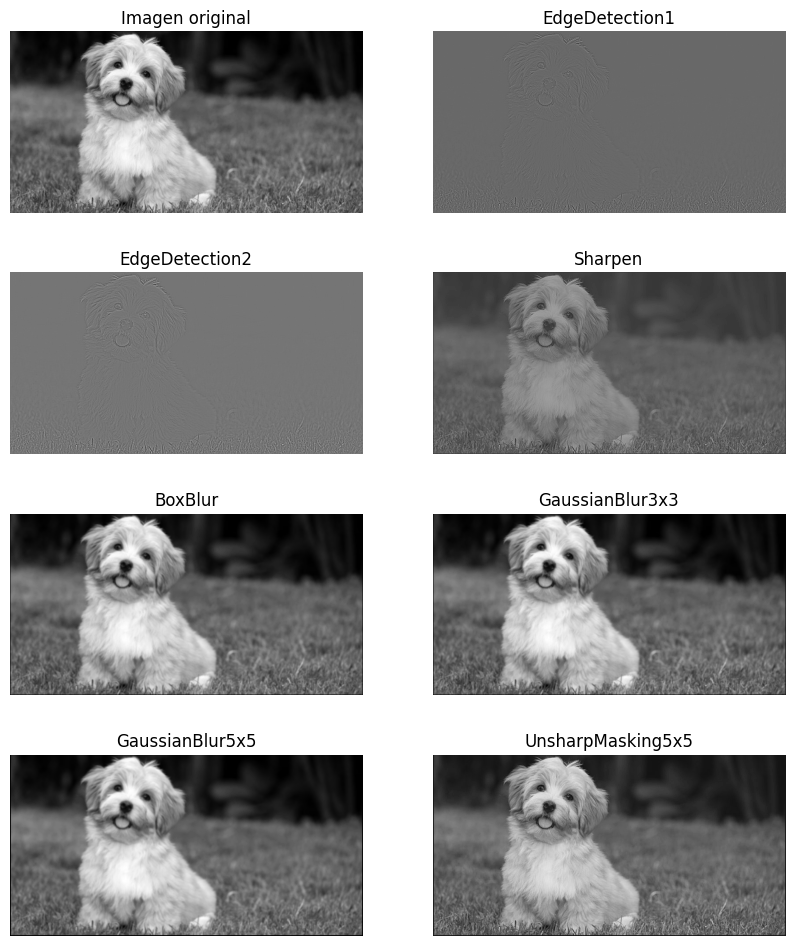

In [88]:
img = cv2.imread("perro1.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Definción de kernels
EdgeDetection1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
EdgeDetection2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
Sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
BoxBlur = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
GaussianBlur3x3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
GaussianBlur5x5 = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]])/256
UnsharpMasking5x5 = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, -476, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]])*-1/256

plt.figure(figsize=(10,12))
plt.subplot(4,2,1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title('Imagen original') 
plt.axis("off")

plt.subplot(4,2,2)
plt.imshow(filtroConvolucion(img, EdgeDetection1),cmap=plt.cm.gray)
plt.title('EdgeDetection1') 
plt.axis("off")

plt.subplot(4,2,3)
plt.imshow(filtroConvolucion(img, EdgeDetection2),cmap=plt.cm.gray)
plt.title('EdgeDetection2') 
plt.axis("off")

plt.subplot(4,2,4)
plt.imshow(filtroConvolucion(img, Sharpen),cmap=plt.cm.gray)
plt.title('Sharpen') 
plt.axis("off")

plt.subplot(4,2,5)
plt.imshow(filtroConvolucion(img, BoxBlur),cmap=plt.cm.gray)
plt.title('BoxBlur') 
plt.axis("off")

plt.subplot(4,2,6)
plt.imshow(filtroConvolucion(img, GaussianBlur3x3),cmap=plt.cm.gray)
plt.title('GaussianBlur3x3') 
plt.axis("off")

plt.subplot(4,2,7)
plt.imshow(filtroConvolucion(img, GaussianBlur5x5),cmap=plt.cm.gray)
plt.title('GaussianBlur5x5') 
plt.axis("off")

plt.subplot(4,2,8)
plt.imshow(filtroConvolucion(img, UnsharpMasking5x5),cmap=plt.cm.gray)
plt.title('UnsharpMasking5x5') 
plt.axis("off")


# Problema 6

Investigue que hace el kernel Laplaciano y como este enfoque se diferencia de usar el algoritmo de Canny para la detección de bordes.


* El algoritmo de Canny sigue un enfoque más complejo y consta de varios pasos, como la suavización de la imagen, la aplicación del gradiente, la supresión de no máximos y la histéresis.

* El kernel laplaciano es un enfoque más simple, basado en la aplicación de un operador de convolución a la imagen.

Si un filtro contiene como parte de sus coeficientes numeros negativos, su operacion puede interpretarse como la diferencia de dos diferentes sumas: La suma de todas las combinaciones lineales de los coeficientes positivos del filtro menos la suma de todas las combinaciones lineales debidas a los coeficientes negativos.

La funcion del filtro Laplaciano queda definida por:

![alt text](image-1.png)

Curiosamente esta funcion es conocida como «Mexican hat» (o sombrero Mexicano) dada la forma tan parecida de su grafica resultante con el sombrero tipico Mexicano:

![alt text](image-2.png)

El siguiente kernel 5×5 que se presenta pertenece al filtro de Laplace, el cual, realiza la diferencia entre el punto central (unico coeficiente positivo con valor de 16) y la suma negativa de 12 coeficientes con valores de -1 y -2. Los coeficientes restantes valen cero y no son considerados en el procesamiento:

![alt text](image-3.png)



![alt text](<Screenshot at Aug 10 15-13-50.png>)

### Probando kernels laplacianos

(np.float64(-0.5), np.float64(799.5), np.float64(411.5), np.float64(-0.5))

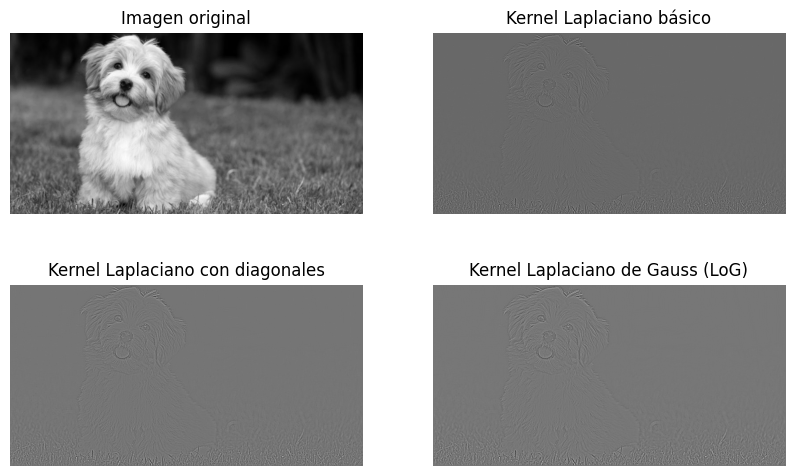

In [89]:
img = cv2.imread("perro1.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Definción de kernels
LaplaceBasico = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
LaplaceDiagonales = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
LaplaceLoG = np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]])

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title('Imagen original') 
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(filtroConvolucion(img, LaplaceBasico),cmap=plt.cm.gray)
plt.title('Kernel Laplaciano básico') 
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(filtroConvolucion(img, LaplaceDiagonales),cmap=plt.cm.gray)
plt.title('Kernel Laplaciano con diagonales') 
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(filtroConvolucion(img, LaplaceLoG),cmap=plt.cm.gray)
plt.title('Kernel Laplaciano de Gauss (LoG)') 
plt.axis("off")

